<span style="color: #79b6be">
    
# <center>Our Summer Training Graduation Project  
# <center>Team 16
    
![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)
    
<span style="color: #014c7a">    
    
# <center> Date of creation

 **<center>30 August 2023**

# Importing Libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Importing Data

In [119]:
data = pd.read_csv('Mall_Customers.csv')

# Previewing My data

In [120]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [121]:
data.duplicated().sum()

0

In [122]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Preprocessing Data

In [123]:
data.drop('CustomerID',inplace=True,axis=1)

In [124]:
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})

In [125]:
data.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [126]:
data.shape

(200, 4)

# Checking For Outliers

Outliers For Annual Income

In [127]:
#Calculating IQR for annual income
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1

#Setting our upper and lower limits
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

132.75
-13.25


In [128]:
#Counting the outliers for annual income
cnt=0
for i in range(len(data)):
  if data['Annual Income (k$)'].iloc[i] > upper_bound:
          cnt+=1
  if data['Annual Income (k$)'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

2


In [129]:
#Replacing outliers for annual income
for i in range(len(data)):
  if data['Annual Income (k$)'].iloc[i] > upper_bound:
          data.loc[i, 'Annual Income (k$)'] = data['Annual Income (k$)'].mean()
  if data['Annual Income (k$)'].iloc[i] < lower_bound:
          data.loc[i, 'Annual Income (k$)'] = data['Annual Income (k$)'].mean()

Outliers For Age

In [130]:
#Calculating IQR for age
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1

#Setting our upper and lower limits
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

79.375
-1.625


In [131]:
#Counting the outliers
cnt=0
for i in range(len(data)):
  if data['Age'].iloc[i] > upper_bound:
          cnt+=1
  if data['Age'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

0


Outliers For Spending Score

In [132]:
#Calculating IQR
Q1 = data['Spending Score (1-100)'].quantile(0.25)
Q3 = data['Spending Score (1-100)'].quantile(0.75)
IQR = Q3-Q1

#Setting our upper and lower limits
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

130.375
-22.625


In [133]:
#Counting the outliers
cnt=0
for i in range(len(data)):
  if data['Spending Score (1-100)'].iloc[i] > upper_bound:
          cnt+=1
  if data['Spending Score (1-100)'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

0


## Clustering

C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

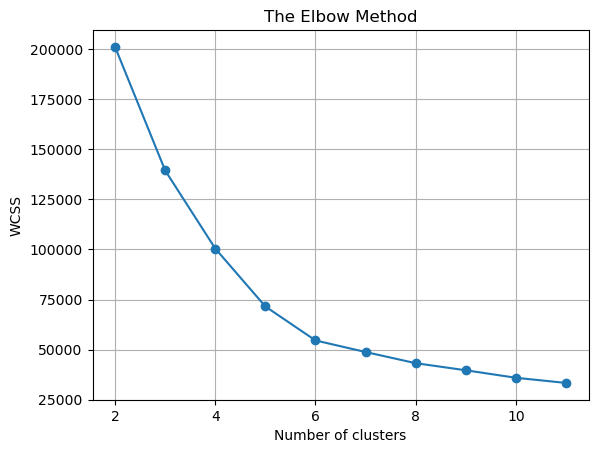

In [134]:
#The elbow method to check the optimal k(number of clusters)
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 12), wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [135]:
data_scalar = StandardScaler().fit_transform(data)

In [136]:
kmeans = KMeans(n_clusters=5, init='random', max_iter=300,random_state=0)
y_predicted = kmeans.fit_predict(data)
data['Clusters'] = kmeans.labels_
data['Clusters'].value_counts()

C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    80
1    39
0    36
3    23
4    22
Name: Clusters, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

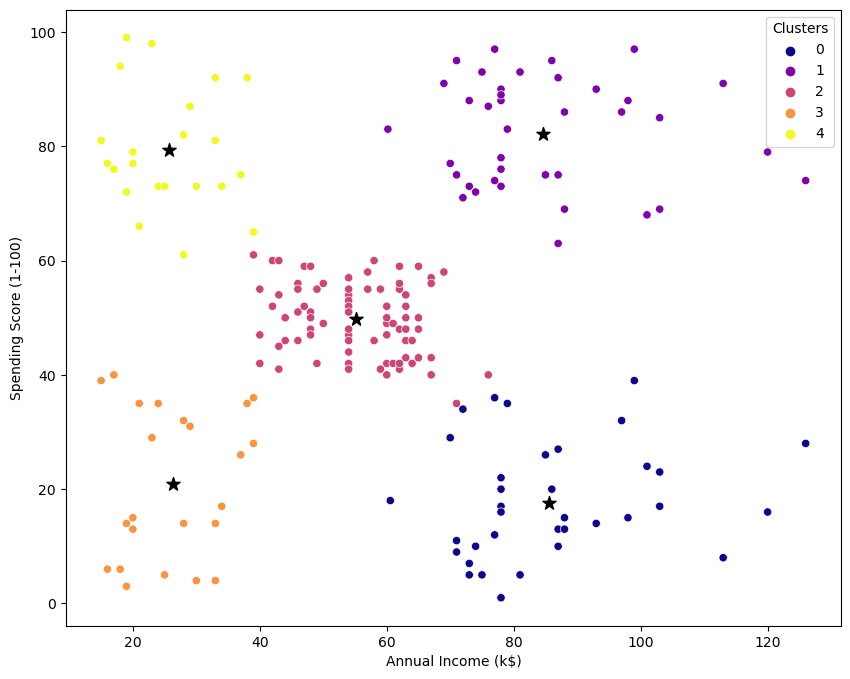

In [137]:
centers =pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['Annual Income (k$)'],y=centers['Spending Score (1-100)'],s=100,c='black',marker='*')
sns.scatterplot(data=data, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Clusters',palette='plasma')

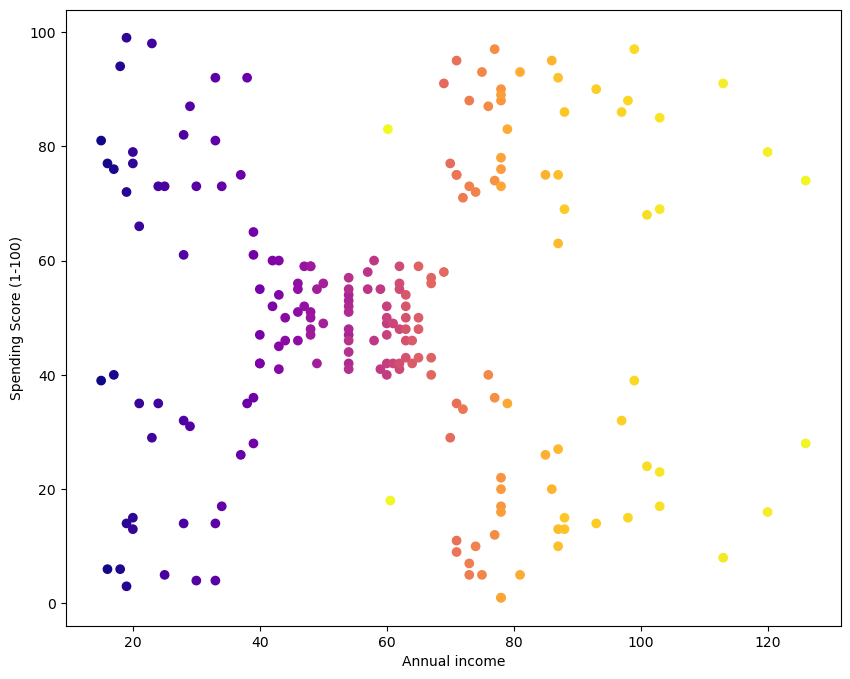

In [138]:
dbscan = DBSCAN(eps = 0.5, min_samples = 1).fit(data)
labels = dbscan.labels_
plt.figure(figsize=(10,8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = labels, cmap= "plasma")
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual income")
plt.show()

# Data Visualization

In [139]:
sex_percent=data['Gender'].value_counts(normalize=True) * 100
print(sex_percent)

1    56.0
0    44.0
Name: Gender, dtype: float64


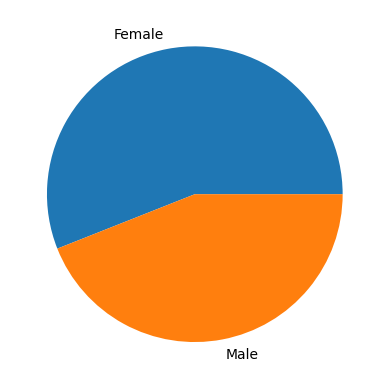

In [140]:
plt.pie(data['Gender'].value_counts(), labels = ['Female',"Male"])
plt.show()

In [141]:
data.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7724\501184253.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Gender'])['Age', 'Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
0,39.806818,60.485657,48.511364
1,38.098214,59.250000,51.526786


In [142]:
def age_period(Age):
  if Age >= 18 and Age <= 25:
    return "Young Adult"
  elif Age > 25 and Age <= 44:
    return "Adult"
  elif Age > 44 and Age <= 59:
    return "Middle Age"
  else:
    return "Old Age"
data['Age period']=data['Age'].apply(age_period)

In [143]:
def score_period(Score):
  if Score <= 10:
    return "Very low spending"
  elif Score > 10 and Score <= 30:
    return "Low spending"
  elif Score > 30 and Score <= 50:
    return "Moderate spending"
  elif Score > 50 and Score <= 70:
    return "High spending"
  else:
    return "Very high spending"
data['Score period']=data['Spending Score (1-100)'].apply(score_period)

In [144]:
def income_period(Income):
  if Income >= 15 and Income <= 30:
    return "Low income"
  elif Income > 30 and Income <= 70:
    return "Middle income"
  elif Income > 70 and Income <= 100:
    return "Upper middle income"
  else:
    return "High income"
data['Income period']=data['Annual Income (k$)'].apply(income_period)

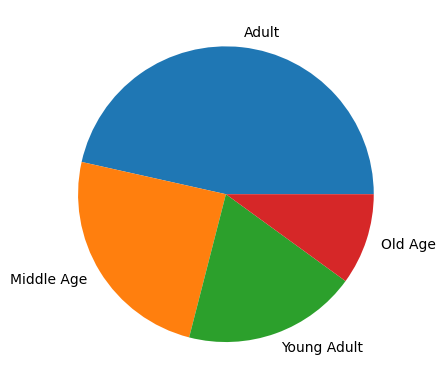

In [145]:
plt.pie(data['Age period'].value_counts(), labels = ['Adult','Middle Age','Young Adult','Old Age'])
plt.show()

In [146]:
data['Score period'].value_counts()

Moderate spending     57
Very high spending    54
High spending         43
Low spending          30
Very low spending     16
Name: Score period, dtype: int64

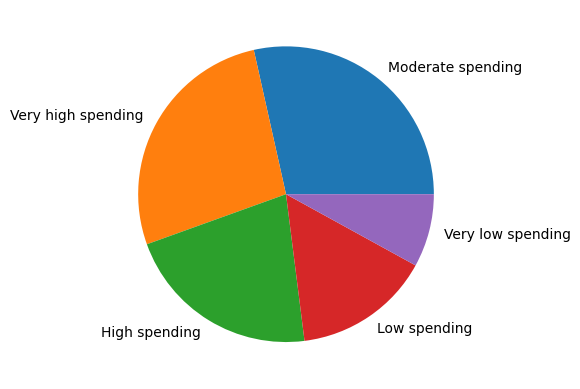

In [147]:
plt.pie(data['Score period'].value_counts(), labels = ['Moderate spending','Very high spending','High spending','Low spending','Very low spending'])
plt.show()

In [148]:
data['Income period'].value_counts()

Middle income          96
Upper middle income    60
Low income             32
High income            12
Name: Income period, dtype: int64

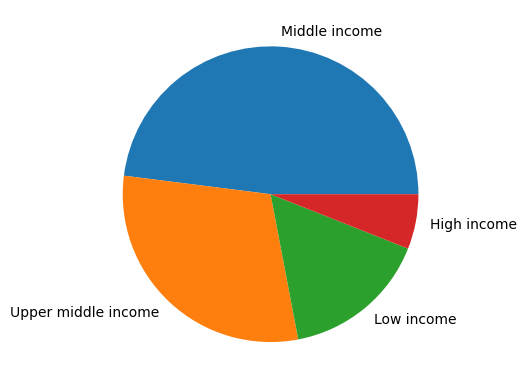

In [149]:
plt.pie(data['Income period'].value_counts(), labels = ['Middle income','Upper middle income','Low income','High income'])
plt.show()

In [150]:
n_score = data.groupby(['Age period', 'Score period']).size().unstack(fill_value=0)
n_score

Score period,High spending,Low spending,Moderate spending,Very high spending,Very low spending
Age period,,,,,
Adult,15,12,19,41,6
Middle Age,10,15,20,0,4
Old Age,8,1,9,0,2
Young Adult,10,2,9,13,4


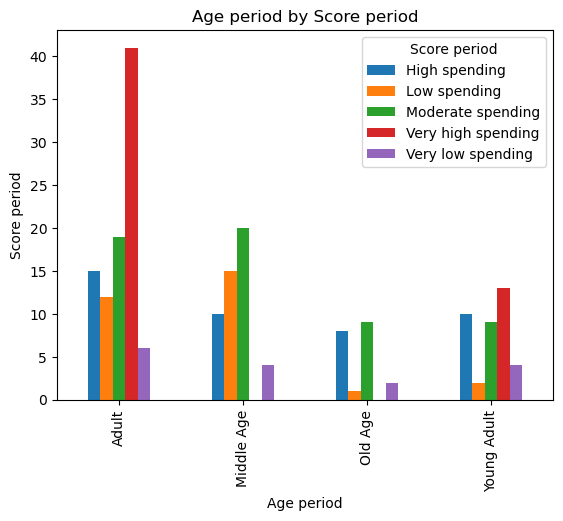

In [151]:
n_score.plot(kind='bar')
plt.xlabel('Age period')
plt.ylabel('Score period')
plt.title('Age period by Score period')
plt.show()

In [152]:
n_income = data.groupby(['Age period', 'Income period']).size().unstack(fill_value=0)
n_income

Income period,High income,Low income,Middle income,Upper middle income
Age period,,,,
Adult,9,12,28,44
Middle Age,3,5,30,11
Old Age,0,3,17,0
Young Adult,0,12,21,5


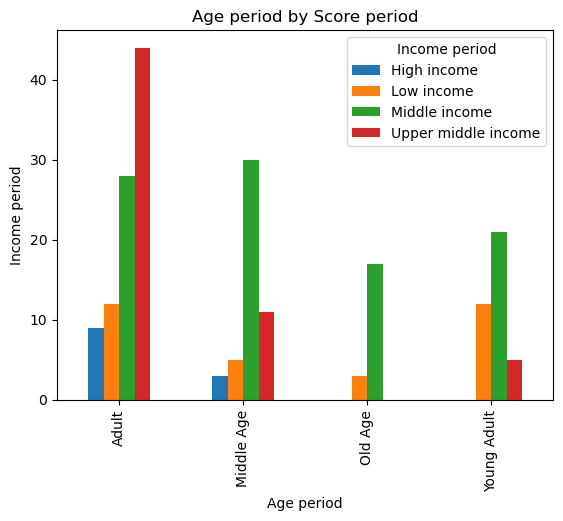

In [153]:
n_income.plot(kind='bar')
plt.xlabel('Age period')
plt.ylabel('Income period')
plt.title('Age period by Score period')
plt.show()

In [154]:
n_age = data.groupby(['Age period', 'Gender']).size().unstack(fill_value=0)
n_age

Gender,0,1
Age period,,
Adult,38,55
Middle Age,20,29
Old Age,12,8
Young Adult,18,20


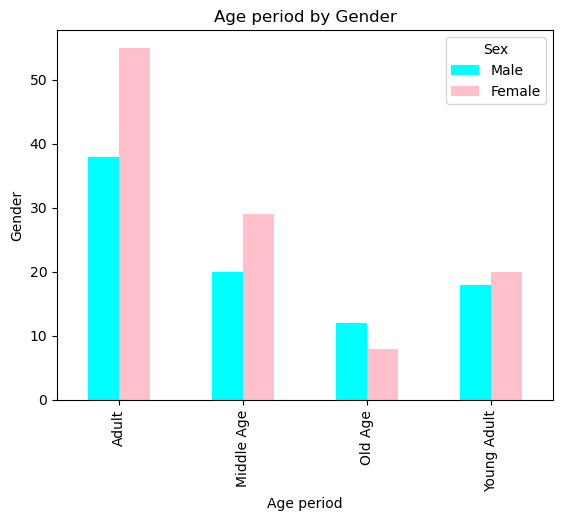

In [155]:
n_age.plot(kind='bar', color=['cyan', 'pink'])
plt.xlabel('Age period')
plt.ylabel('Gender')
plt.title('Age period by Gender')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

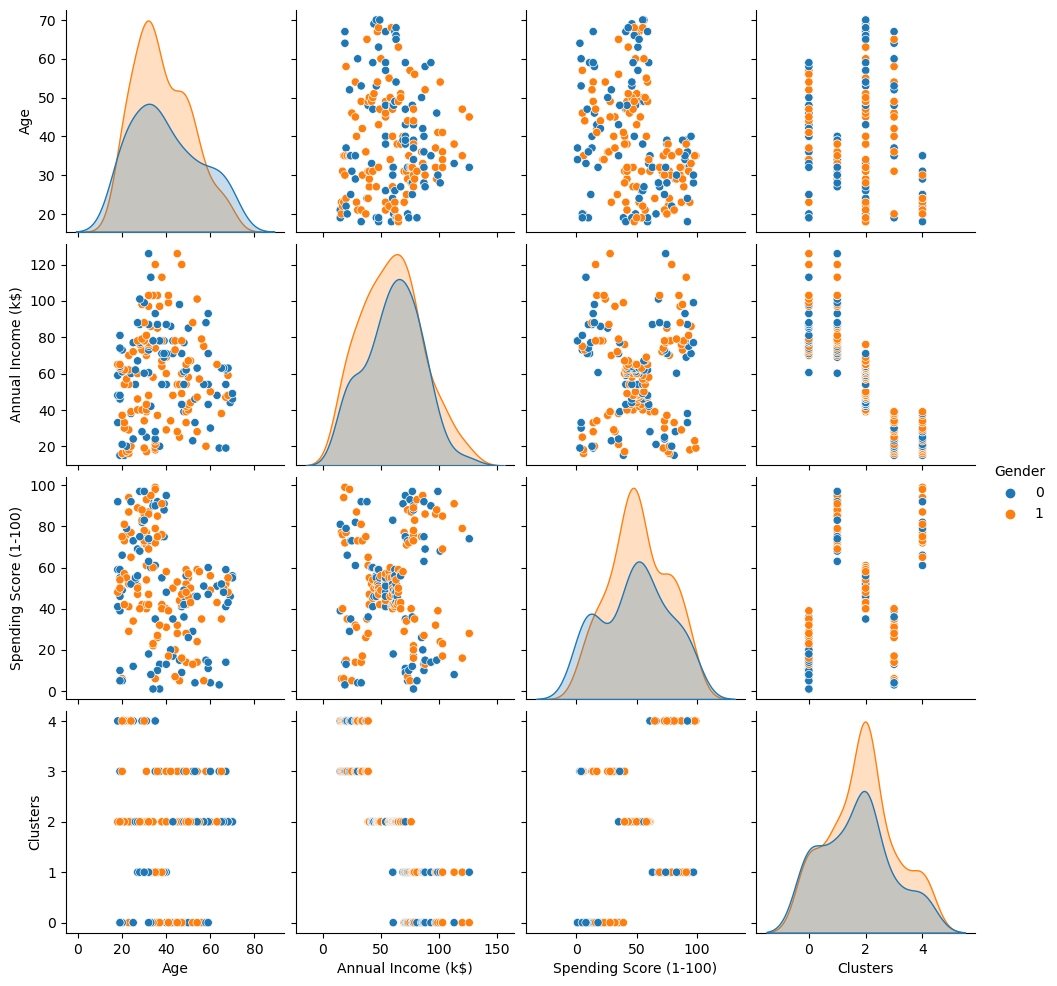

In [156]:
sns.pairplot(data,hue='Gender')

In [157]:
data.groupby('Clusters')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7724\509976719.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Clusters')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,40.666667,85.626667,17.583333
1,32.692308,84.568662,82.128205
2,42.937500,55.087500,49.712500
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [158]:
n_clusters_vs_age = data.groupby(['Clusters', 'Age period']).size().unstack(fill_value=0)
n_clusters_vs_age

Age period,Adult,Middle Age,Old Age,Young Adult
Clusters,,,,
0,16,14,0,6
1,39,0,0,0
2,23,26,16,15
3,8,9,4,2
4,7,0,0,15


In [159]:
n_clusters_vs_income = data.groupby(['Clusters', 'Income period']).size().unstack(fill_value=0)
n_clusters_vs_income

Income period,High income,Low income,Middle income,Upper middle income
Clusters,,,,
0,6,0,2,28
1,6,0,3,30
2,0,0,78,2
3,0,16,7,0
4,0,16,6,0


In [160]:
n_clusters_vs_score = data.groupby(['Clusters', 'Score period']).size().unstack(fill_value=0)
n_clusters_vs_score

Score period,High spending,Low spending,Moderate spending,Very high spending,Very low spending
Clusters,,,,,
0,0,21,5,0,10
1,4,0,0,35,0
2,36,0,44,0,0
3,0,9,8,0,6
4,3,0,0,19,0


## Regression

In [169]:
from sklearn.cluster import KMeans

# Assuming you have preprocessed data stored in X
X=data[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]
# Choose the number of clusters
num_clusters = 5

# Create a KMeans object and fit it to the data
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Obtain the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Assign labels to the clusters
# You can manually assign labels based on domain knowledge or use other techniques
cluster_labels_to_labels = {
    0: 'Label A',
    1: 'Label B',
    2: 'Label C',
    3: 'Label D',
    4: 'Label E'
}

# Assign labels to data points based on cluster assignments
assigned_labels = [cluster_labels_to_labels[label] for label in cluster_labels]

C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have features stored in X and assigned labels stored in assigned_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, assigned_labels, test_size=0.2, random_state=42)

# Create a LogisticRegression object
logistic_regression = LogisticRegression()

# Fit the logistic regression model to the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
predictions = logistic_regression.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9


C:\Users\Mariam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Deployment

In [ ]:
import joblib
joblibfile='My File'
joblib.dump(logistic_regression,joblibfile)
loaded_model=joblib.load(open('My File','rb'))

<span style="color: #79b6be">
    
# **Conclusion:**

<span style="color: #014c7a">
    
 
**Anuual Income**


- The majority of people (96) are in the middle income category. This is followed by upper middle income (60), low income (32), and high income (12).
- We can conclude that the majority of people in this population are not wealthy, but they are also not struggling to make ends meet. 
- There is a smaller percentage of people who are in the low income category, and a very small percentage who are in the high income category.

**Spending Score**
   
- The spending period data shows that the majority of people (57) have a moderate spending score. 
 - This is followed by very high spending (54), high spending (43), low spending (30), and very low spending (16).

- We can conclude that the majority of people in this population are not big spenders, but they also do not spend very little. There is a smaller percentage of people who are in the very high spending category, and a very small percentage who are in the very low spending category.

- This data could be used to inform businesses about the spending habits of their customers. For example, a business that sells luxury goods might want to target people who have a very high spending score.


**Spending Score - Age**
<span style="color: #014c7a">
- We can conclude that there is a clear relationship between age and spending score. Adults tend to have the highest spending scores, followed by middle-aged people. Older people and young adults tend to have lower spending scores.

- This data could be used by businesses to target their marketing and advertising campaigns to different age groups. 
- For example, a business that sells luxury goods might want to target adults, while a business that sells budget-friendly products might want to target young adults.

**Age - Income**
<span style="color: #014c7a">
- We can conclude that there is a clear relationship between age and income level. Adults tend to have the highest income levels, followed by middle-aged people. Older people and young adults tend to have lower income levels.

- This data could be used by businesses to target their marketing and advertising campaigns to different age groups. For example, a business that sells luxury goods might want to target adults, while a business that sells budget-friendly products might want to target young adults.

**Age - Gender**
<span style="color: #014c7a">
- Overall, the table shows that there is a slight skew towards females in the adult and older age groups, and a slight skew towards males in the middle-aged and young adult age groups. However, the difference is not significant.



<span style="color: #79b6be">
    
## **Clusters Conclusion:**


<span style="color: #014c7a">

**Cluster 0** is the third largest cluster, and it consists of adults and middle-aged who are mostly upper-middle-income earners and low spenders. This could be a group of  adults who are just starting out in their careers and may not have a lot of disposable income.

**Cluster 1** is the second largest cluster, and it consists of adults who are mostly upper-middle-income earners andvery high spenders. This could be a group of adults who are established in their careers and have a lot of disposable income.

**Cluster 2** is the largest cluster, and it consists of middle-aged people who are mostly middle-income earners and moderate spending habits. This could be a group of middle-aged people who are in different stages of their careers and may have different financial obligations.

**Cluster 3** is the second smallest cluster, and it consists of adults and middle-aged people who are mostly low-income earners and low spenders. This could be a group of adults who are living paycheck to paycheck and may be struggling to make ends meet.

**Cluster 4** is the smallest cluster, and it consists of young adults who are mostly low-income earners and very high spenders. This could be a group of young adults who are living paycheck to paycheck and may be struggling to make ends meet.